In [1]:
%load_ext autoreload
%autoreload 2

In [106]:
import torch
import numpy as np
from glob import glob
import librosa

In [107]:
files_clases = np.array([[f, f.split('/')[4]] for f in glob('../kaggle-birds/dataset/wavs_32k/'+'**/*', recursive=True) if '.wav' in f])

In [108]:
clases = list(set(files_clases[:, 1]))
len(clases)

264

In [109]:
clases_dict = {c:i for i, c in enumerate(clases)}

In [110]:
files = list(files_clases[:, 0])
len(files)

21375

In [217]:
# clases_dict

In [218]:
max(0, 3)

3

In [258]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, files, clases_dict, sr=32000, duration=5):
        self.sr = sr
        self.files = files
        self.clases_dict = clases_dict
        self.n_classes = len(clases_dict)
        self.chunk_samples = duration * sr
    
    def sample_audio_clip(self, clip):
        fr = int(np.random.rand(1)*(len(clip)-self.chunk_samples))
        if fr >= 0:
            to = fr + self.chunk_samples
            x = clip[fr:to]
        else:
            x = np.zeros(self.chunk_samples)
            fr = int(np.random.rand(1)*(self.chunk_samples-len(clip)))
            x[fr:fr+len(clip)] = clip
        print(x.shape)
        return np.array(x, dtype='float32')
        
    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file = files[idx]
        clase = self.clases_dict[file.split('/')[4]]
        audio, sr = librosa.load(file, sr=self.sr)
        audio = self.sample_audio_clip(audio)
        y = torch.zeros(self.n_classes)
        y[clase] = 1
        return audio.reshape(1, -1), y

In [259]:
dataset = Dataset(files, clases_dict)

In [260]:
params_train = {
    'batch_size': 16,
    'shuffle': True,
    'num_workers': 0,
}
training_generator = torch.utils.data.DataLoader(dataset, **params_train)

In [261]:
for X, y in training_generator:
    break

(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)
(160000,)


In [262]:
X.shape, y.shape

(torch.Size([16, 1, 160000]), torch.Size([16, 264]))

In [263]:
from utils import BirdsNet

In [275]:
model = BirdsNet(a=-1.8)

Using cache found in /home/usuario/.cache/torch/hub/pytorch_vision_v0.6.0


In [276]:
mel_model_out, pred = model(X)

In [277]:
mel_model_out[0].shape

torch.Size([1, 128, 1235])

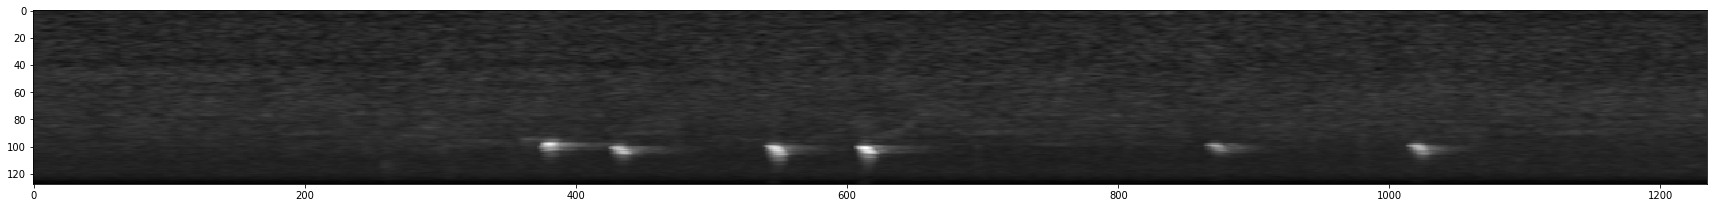

In [281]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30,4))
plt.imshow((mel_model_out[2].detach().numpy().squeeze(0)), cmap='gray')